**Subham Banerjee**

**C20028**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###### Feature Extraction based on time stamp variable

In [ ]:
def daytime (row):
    if (row['hour'] <= 6) or (row['hour'] > 22):
        return ("night")
    elif (row['hour'] > 6) and (row['hour'] <= 12):
        return ("morning")
    elif (row['hour'] > 12) and (row['hour'] <= 17):
        return ("afternoon")
    elif (row['hour'] > 17) and (row['hour'] <= 22):
        return ("evening")

    
def add_time_features(df):
    df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
    df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
    df['day'] = df['pickup_datetime'].apply(lambda x: x.day)
    df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
    df['weekday'] = df['pickup_datetime'].apply(lambda x: x.weekday())
    df['pickup_datetime'] =  df['pickup_datetime'].apply(lambda x: str(x))
    df['daytime'] = df.apply (lambda x: daytime(x), axis=1)
    df = df.drop('pickup_datetime', axis=1)
    df=df.drop('hour',axis=1)
    df=df.drop('day',axis=1)
    return df

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Data.csv to Data.csv


In [ ]:
df = pd.read_csv("Data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
 6   fare_amount        9914 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 542.3+ KB


In [ ]:
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %Z',errors='coerce')

In [ ]:
df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [ ]:
df= add_time_features(df)

In [ ]:
df["year"] = df["year"].astype(object)
df["month"] = df["month"].astype(object)
df["weekday"] = df["weekday"].astype(object)

###### Feature extraction based on pick up and drop off latitudes and longitudes.
###### Geopy can calculate geodesic distance between two points using the geodesic distance or the great-circle distance, with a default of the geodesic distance available as the function geopy.distance.distance.

In [ ]:
from geopy.distance import geodesic
from geopy.distance import great_circle
df['great_circle']=df.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)
df['geodesic']=df.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   9914 non-null   float64
 1   pickup_latitude    9914 non-null   float64
 2   dropoff_longitude  9914 non-null   float64
 3   dropoff_latitude   9914 non-null   float64
 4   passenger_count    9914 non-null   int64  
 5   fare_amount        9914 non-null   float64
 6   year               9914 non-null   object 
 7   month              9914 non-null   object 
 8   weekday            9914 non-null   object 
 9   daytime            9914 non-null   object 
 10  great_circle       9914 non-null   float64
 11  geodesic           9914 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 929.6+ KB


## Exploratory Data Analysis

##### Cab Fare vs. Year

In [ ]:
def time_analysis(df):
    return pd.DataFrame({"FareAverage":np.mean(df.fare_amount),"Count":np.size(df.fare_amount),"FareSum":sum(df.fare_amount)},index=["Time"] )

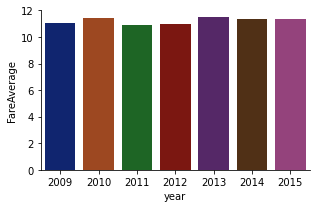

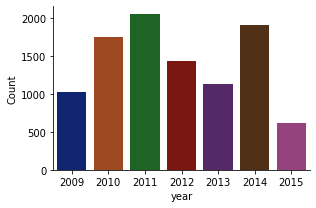

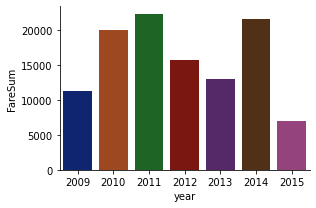

In [ ]:
df_yearly=df.groupby('year').apply(time_analysis).reset_index()
sns.catplot(x="year", y="FareAverage", kind="bar", data=df_yearly,color="c",palette="dark",height=3, aspect=1.5)
sns.catplot(x="year", y="Count", kind="bar", data=df_yearly,color="g",palette="dark",height=3, aspect=1.5)
sns.catplot(x="year", y="FareSum", kind="bar", data=df_yearly,color="m",palette="dark",height=3, aspect=1.5)

**The average fair has been more or less the same over the years. But the count of rides and corresponding revenue generated increased initially and then decreased and another fluctuation happened later. There is no such pattern derived from the yearly analysis.**

##### Cab Fare vs month

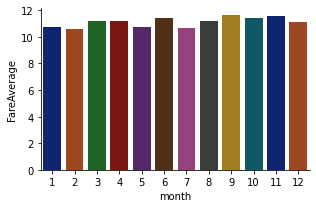

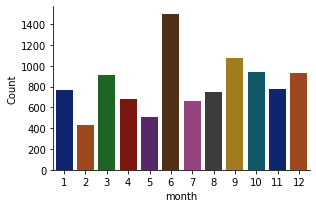

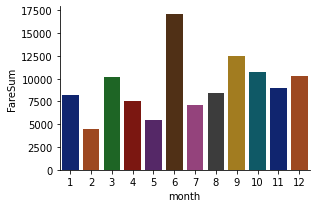

In [ ]:
df_monthly=df.groupby('month').apply(time_analysis).reset_index()
sns.catplot(x="month", y="FareAverage", kind="bar", data=df_monthly,color="c",palette="dark",height=3, aspect=1.5)
sns.catplot(x="month", y="Count", kind="bar", data=df_monthly,color="g",palette="dark",height=3, aspect=1.5)
sns.catplot(x="month", y="FareSum", kind="bar", data=df_monthly,color="m",palette="dark",height=3, aspect=1.5)

**The average fare for all the months over the year has been more or less constant**

***However it is seen that the count of rides as well as the revenue generated over the years is maximum for the month of June. One reason can be educational institues mostly start their academic sessions at that time. Plus, due to the extreme hot climate in the month of June, people usually prefers a cab ride. We can also see that during the end months the rides and total revenue generated is higher than the starting months because those are the months of festivals.***

##### Cab Fare vs Weekday

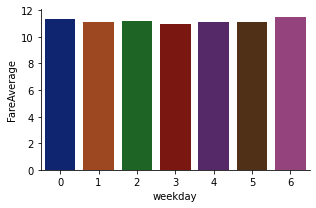

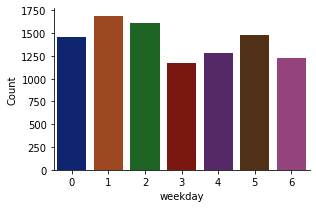

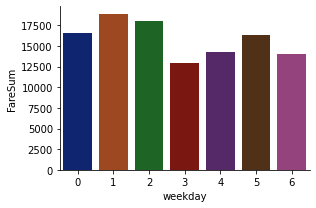

In [ ]:
df_weekly=df.groupby('weekday').apply(time_analysis).reset_index()
sns.catplot(x="weekday", y="FareAverage", kind="bar", data=df_weekly,color="c",palette="dark",height=3, aspect=1.5)
sns.catplot(x="weekday", y="Count", kind="bar", data=df_weekly,color="g",palette="dark",height=3, aspect=1.5)
sns.catplot(x="weekday", y="FareSum", kind="bar", data=df_weekly,color="m",palette="dark",height=3, aspect=1.5)

**Again, the average fare over the week is more or less the same. But it has been seen that the number of rides and revenue generated is slightly more during weekdays than during weekends mostly because of offices and educational institutes. The same reason can be given for the daily analysis given below.**

##### Cab Fare vs Daytime

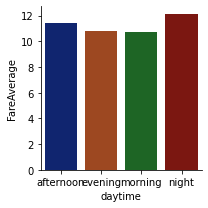

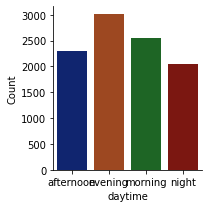

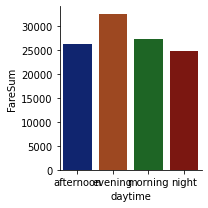

In [ ]:
df_daily=df.groupby('daytime').apply(time_analysis).reset_index()
sns.catplot(x="daytime", y="FareAverage", kind="bar", data=df_daily,color="c",palette="dark",height=3, aspect=1)
sns.catplot(x="daytime", y="Count", kind="bar", data=df_daily,color="g",palette="dark",height=3, aspect=1)
sns.catplot(x="daytime", y="FareSum", kind="bar", data=df_daily,color="m",palette="dark",height=3, aspect=1)

**Cab rides are much more during the morning time because people are generally going to workplaces and also during the evening time as people generally travelling back from offices, going out for dinner,movies,hanging out after college/office. Also the average cab fare is more doing night due to night fare supplement charges.**

##### Cab fare vs Passenger count, distance, pick up and drop off latitude and longitude.

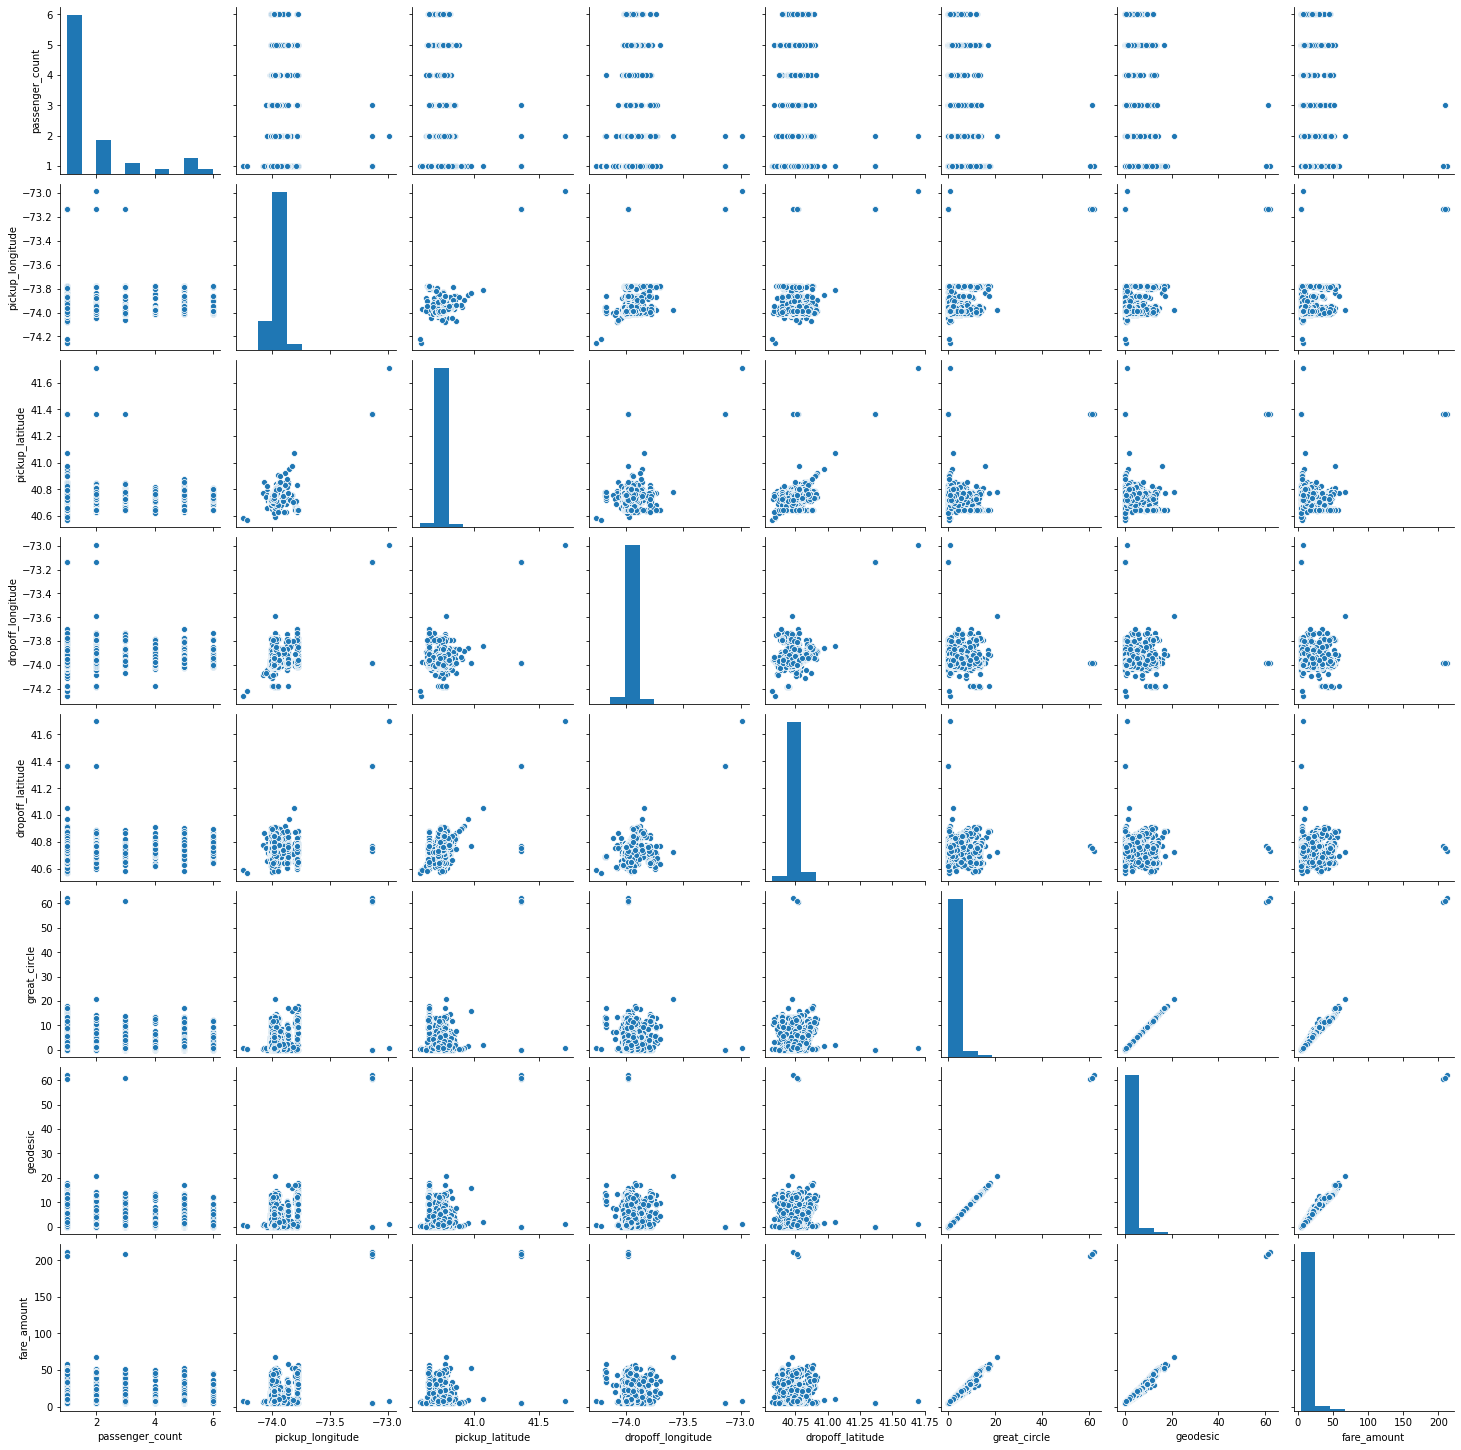

In [ ]:
df1=df[['passenger_count',"pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude", 'great_circle',"geodesic","fare_amount"]]
sns.pairplot(df1)

**As we can see that the fare amount is directly proportional to the distance but for other variables further analysis has to be done.**

###### Due to lesser number of unique values in passenger count, we will treat it as a categorical variable

In [ ]:
df["passenger_count"] = df["passenger_count"].astype(object)

## Correlation Analysis

To check if two independent variables move together directionally. If they do, remove one. Because that could lead to biasness in the model. (Also, if there is only one continuous independent variable, check if it is highly correlated with the target variable. If yes, proceed.)

H0: Two variables are independent 

H1: Two variables are not independent 

• If p-value is less than 0.05 then we reject the null hypothesis saying that 2 variables are dependent. 

• And if p-value is greater than 0.05 then we accept the null hypothesis saying that 2 variables are independent.

In [ ]:
ncol=["great_circle","geodesic","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","fare_amount"]

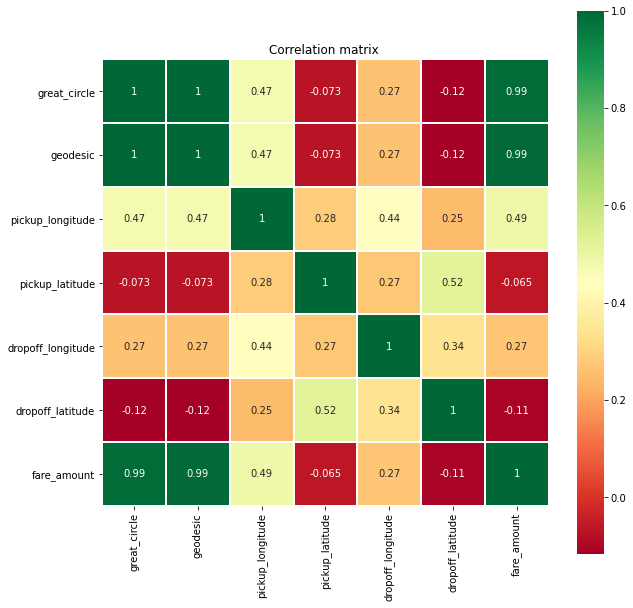

In [ ]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(df[ncol].corr(), square=True, cmap='RdYlGn',linewidths=1,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.show()

**"pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude" are not that correlated with fare amount. Hence dropping them.**

***Great circle and geodesic are highly correlated with each other, hence dropping great circle.***

**geodesic and fare amount are highly correlated with each other. Its p value is calculated. The p value for the above relations can also be calculated in the same way.**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


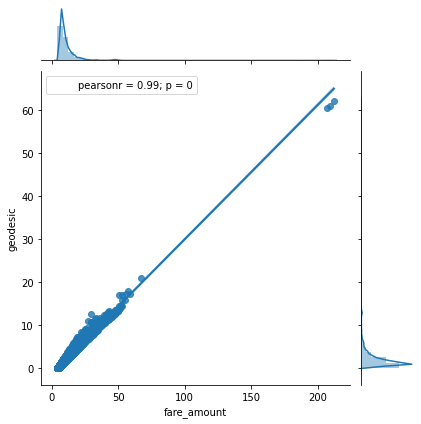

In [ ]:
import scipy.stats as stats
_ = sns.jointplot(x='fare_amount',y='geodesic',data=df,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

**Fare amount and geodesic are also highly correlated with each other and also p=0, hence H0 is rejected stating that they are dependent which is a must need condition for linear regression.**

In [ ]:
df=df.drop(["great_circle","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   object 
 1   fare_amount      9914 non-null   float64
 2   year             9914 non-null   object 
 3   month            9914 non-null   object 
 4   weekday          9914 non-null   object 
 5   daytime          9914 non-null   object 
 6   geodesic         9914 non-null   float64
dtypes: float64(2), object(5)
memory usage: 542.3+ KB


## Chi-square test of Independence for Categorical Variables/Features

Hypothesis testing :

Null Hypothesis: 2 variables are independent.

Alternate Hypothesis: 2 variables are not independent.

If p-value is less than 0.01 then we reject the null hypothesis saying that 2 variables are dependent.

And if p-value is greater than 0.01 then we accept the null hypothesis saying that 2 variables are independent.

There should be no dependencies between Independent variables.

So we will remove that variable whose p-value with other variable is low than 0.01.

And we will keep that variable whose p-value with other variable is high than 0.01.

In [ ]:
# Import label encoder 
colnames = list(df.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if df[col].dtype==object:
        df[col]= label_encoder.fit_transform(df[col])

In [ ]:
cat_var=["passenger_count","year","month","weekday","daytime"] 
catdf=df[cat_var]

In [ ]:
from sklearn.feature_selection import chi2
n= 10
for i in range(0,4):
    X=catdf.iloc[:,i+1:n]
    y=catdf.iloc[:,i]
    chi_scores = chi2(X,y)
    p_values = pd.Series(chi_scores[1],index = X.columns)
    print("for",i)
    print(p_values)
    for j in range (0, len(p_values)):
        if (p_values[j]<0.01):
            print(p_values[j])

for 0
year       7.870021e-23
month      3.364143e-16
weekday    2.402382e-15
daytime    6.468576e-01
dtype: float64
7.87002091427271e-23
3.36414293504598e-16
2.402382417973176e-15
for 1
month      0.000000e+00
weekday    4.977830e-22
daytime    2.333309e-37
dtype: float64
0.0
4.977830389233907e-22
2.333309159406429e-37
for 2
weekday    3.435342e-265
daytime    4.784512e-109
dtype: float64
3.435341550035725e-265
4.7845115703634135e-109
for 3
daytime    1.498798e-83
dtype: float64
1.4987976255251132e-83


**year, month and weekday are dependent on others, p value is less than 0.01, hence rejecting H0 for their relations and dropping them.**

In [ ]:
df=df.drop(["year","month","weekday"],axis=1)

## Anova test

It is carried out to compare between each groups in a categorical variable.

ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.

Hypothesis testing :

Null Hypothesis: mean of all categories in a variable are same.

Alternate Hypothesis: mean of at least one category in a variable is different.

If p-value is less than 0.05 then we reject the null hypothesis.

And if p-value is greater than 0.05 then we accept the null hypothesis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   fare_amount      9914 non-null   float64
 2   daytime          9914 non-null   int64  
 3   geodesic         9914 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 309.9 KB


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('fare_amount ~ C(passenger_count)+C(daytime)',data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count),5.0,747.091246,149.418249,2.457316,3.113597e-02
C(daytime),3.0,2888.846763,962.948921,15.836554,2.859320e-10
Residual,9905.0,602278.057340,60.805458,NaN,NaN


In [ ]:
probanova=list(aov_table["PR(>F)"])
for i in range(0,3):
    if probanova[i]>0.05:
        print(i)

**No variable has same mean for all the categories.  P value is less than 0.05, thus we reject H0**.

## Multicollinearity Test
VIF is always greater or equal to 1.

if VIF is 1 --- Not correlated to any of the variables.

if VIF is between 1-5 --- Moderately correlated.

if VIF is above 5 --- Highly correlated.

If there are multiple variables with VIF greater than 5, only remove the variable with the highest VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
df1=df.drop(["fare_amount"],axis=1)
calc_vif(df1)

,variables,VIF
0,passenger_count,1.189440
1,daytime,1.513916
2,geodesic,1.454591


**None of the remaining variables have high multicollinearity**

In [ ]:
df["passenger_count"] = df["passenger_count"].astype(object)
df["daytime"] = df["daytime"].astype(object)

## Converting passenger count and daytime to dummy variable

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        9914 non-null   float64
 1   geodesic           9914 non-null   float64
 2   passenger_count_1  9914 non-null   uint8  
 3   passenger_count_2  9914 non-null   uint8  
 4   passenger_count_3  9914 non-null   uint8  
 5   passenger_count_4  9914 non-null   uint8  
 6   passenger_count_5  9914 non-null   uint8  
 7   daytime_1          9914 non-null   uint8  
 8   daytime_2          9914 non-null   uint8  
 9   daytime_3          9914 non-null   uint8  
dtypes: float64(2), uint8(8)
memory usage: 232.5 KB


## Multiple regression model

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x = df.drop('fare_amount',axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
y = df['fare_amount'].values

In [ ]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          3.963e+04
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                        0.00
Time:                        05:25:26   Log-Likelihood:                         -22083.
No. Observations:                9914   AIC:                                  4.418e+04
Df Residuals:                    9905   BIC:                                  4.425e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            213.9889      0.530    403.508      0.000     212.949     215.028
1              1.2489      0.063     19.808      0.000       1.125       1.373
2              1.2926      0.109     11.865      0.000       1.079       1.506
3              1.1897      0.158      7.506      0.000       0.879       1.500
4              1.2438      0.088     14.064      0.000       1.070       1.417
5              1.1398      0.171      6.672      0.000       0.805       1.475
6              3.3157      0.047     71.170      0.000       3.224       3.407
7              3.8127      0.048     79.013      0.000       3.718       3.907
8              3.0170      0.055     54.382      0.000       2.908       3.126
==============================================================================
Omnibus:                      522.930   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1637.952
Skew:                          -0.217   Prob(JB):                         0.00
Kurtosis:                       4.943   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***1) Here the R squared statistic value indicates that 97.3 percentage of the variance in the dependent variable is explained by independent variables collectively. So the model does a good job explaining the changes in the dependent variable. Adjusted R square is the same as R squared stating all variables are significant.***

***2) H0: Variables are not carrying any info towards the target variable. (b=0)***

***H1: Variables are carrying info towards target variable. (b != 0)***

***Here we can see that F-statistic value is very large and p value is less than 0.05, thus we reject H0 stating that the variables have a linear relationship and are carrying info towards target variable. (b != 0).***

***3) The maximum value for the log of the likelihood function is -22083, the likelihood that the process described by the model produced the data that were observed (maximise the probability of observing the data).***

***4) Omnibus is a test of the skewness and kurtosis of the residual. The value is relatively high and the probability of omnibus is relatively low indicating that the residual is not normally distributed.***

***5) Even the skew value is not close to 0 confirming the above result.***

***6)DW value suggests that there is positive autocorrelation. That is, error of a given sign tends to be followed by an error of the same sign. For example, positive errors are usually followed by positive errors, and negative errors are usually followed by negative errors.***

***7) Kurtosis of the normal distribution is 3.0. In our case it is close to 5, validates the other results.***

***8) We have a large JB value and the probability of JB is 0 indicating that the errors are not normally distributed.***

***9) In linear regression the condition number of the moment matrix can be used as a diagnostic for multicollinearity. We hope to see a relatively small number (<30), in this case we do.***


## Ways to deal with Non Normal Residual Distribution and positive autocorrelation.

1. One should not remove outliers just because they make the distribution of the residuals non-normal. We may examine the case that has that high residual and see if there are problems with it (the easiest would be if it is a data entry error).

2. Assuming there is no good reason to remove that observation, one can run the regression with and without it and see if there are any large differences in the parameter estimates; if not, you can leave it in and note that removing it made little difference.

3. If it makes a big difference, the choice of the OLS model itself may be entirely wrong for this data set. We may need to look at alternate models. One could try robust regression, which deals with outliers or quantile regression or any other regression model that make no assumptions about the distribution of the residuals.

4. We may have left out some key explanatory variables which is causing some signal to leak into the residuals in the form of auto-correlations. If one can use one residual to predict the next residual, there is some predictive information present that is not captured by the predictors. Typically, this situation involves time-ordered observations. For example, if a residual is more likely to be followed by another residual that has the same sign, adjacent residuals are positively correlated. One can include a variable that captures the relevant time-related information, or use a time series analysis.

5. Maybe one can transform the response variable to make the distribution of the random errors approximately normal, fit the model, transform the predicted values back into the original units using the inverse of the transformation applied to the response variable.